In [39]:
print("hello")

hello


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# np.random.seed(42)

#1
trading_days = 126
noise = np.random.normal(0, 200, trading_days)
trading_volume = 1000 + noise

#2
smoothed_volume = savgol_filter(trading_volume, window_length=11, polyorder=2)

def weekly_totals(smoothed_data):
    weekly_totals = []
    for i in range(0, len(smoothed_data), 5):  # here assumeing 5 trading days per week
        weekly_totals.append(np.sum(smoothed_data[i:i + 5]))
    return np.array(weekly_totals)

weekly_totals = weekly_totals(smoothed_volume)

# 3
print("weekly trading volumes:")
print(weekly_totals)

weekly trading volumes:
[5675.6225726  5237.54085877 5189.90768864 5695.15668185 4668.83518904
 4908.74552369 5448.54413772 5240.98707161 5347.09889331 5032.95085589
 4744.24918361 4376.01006403 5105.76407498 4765.48814953 5259.44996901
 5522.38518394 5100.34541285 5015.66740205 5026.34293016 4987.29826799
 5306.57925057 5671.67640857 5764.21068476 4930.55647521 5379.11037499
 1197.62020318]


In [26]:
# 5
def high_volume_periods(volume_data):
    avg_volume = np.mean(volume_data)
    threshold = 1.5 * avg_volume
    print()
    high_volume_days = volume_data > threshold
    print("high_volume_days :")
    print(high_volume_days)
    periods = []
    
    count = 0
    for day in range(len(high_volume_days)):
        if high_volume_days[day]:
            count += 1
        else:
            if count > 3:
                periods.append((day - count, day - 1))  
            count = 0

    if count > 3:
        periods.append((len(high_volume_days) - count, len(high_volume_days) - 1))
    
    return periods

high_volume_per = high_volume_periods(trading_volume)
print("periods :")
print(high_volume_per)


high_volume_days :
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False]
periods :
[]


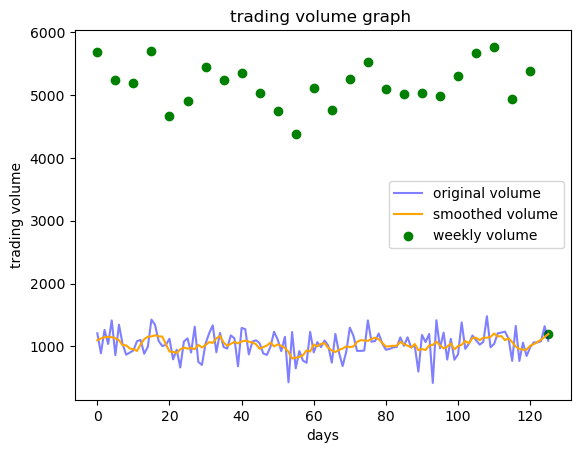

In [46]:
# 4
plt.plot(trading_volume, label='original volume', alpha=0.5, color='blue')
plt.plot(smoothed_volume, label='smoothed volume', color='orange')
plt.scatter(range(0, len(weekly_totals) * 5, 5), weekly_totals, label='weekly volume', color='green', marker='o')

plt.title('trading volume graph ')
plt.xlabel('days')
plt.ylabel('trading volume')
plt.legend()
plt.show()